<a href="https://colab.research.google.com/github/neuralsrg/Python-Projects/blob/main/signal_processing/signal_filtering_fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal filtering using Fourier Transform 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


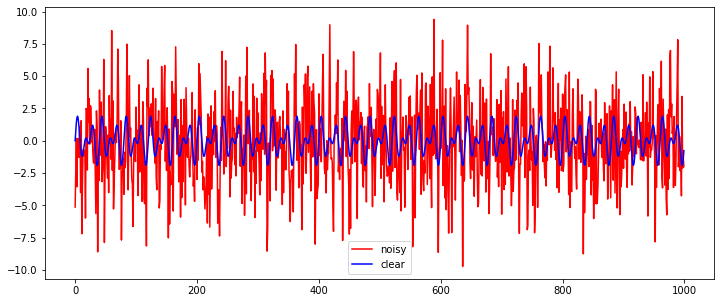

In [14]:
dtime = 0.001

t = np.arange(0, 1, dtime)
freqs = [50, 75]
f = np.sum(np.sin(2*np.pi*w*t) for w in freqs)
f_noisy = f + 3. * np.random.randn(len(f))

plt.figure(figsize=(12, 5))
plt.plot(f_noisy, c='red', label='noisy')
plt.plot(f, linewidth=1.5, c='blue', label='clear')
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Text(0.5, 1.0, 'frequency domain')

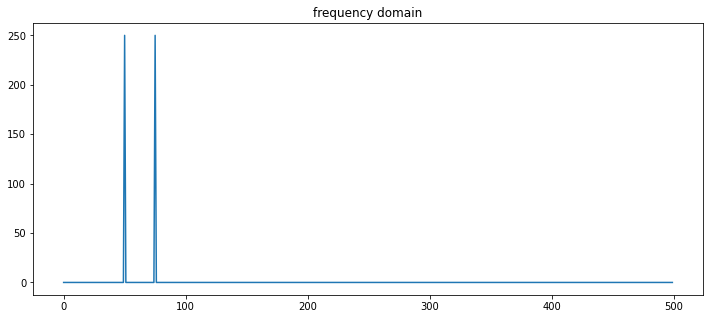

In [22]:
fft = np.fft.fft(f)
power_spectrum = (np.abs(fft) ** 2) / len(f)
frequencies = (1/dtime) * (np.arange(len(f)) / len(f))

# we should take omly the first half
take = np.floor(len(f) / 2).astype(np.int)

plt.figure(figsize=(12, 5))
plt.plot(frequencies[:take], power_spectrum[:take])
plt.title('frequency domain')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-10.0, 10.0)

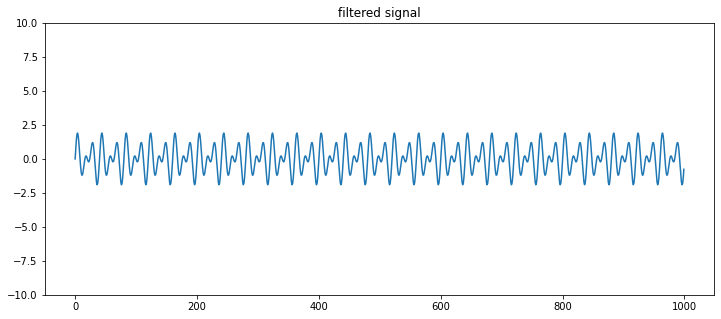

In [31]:
filtered = fft * (power_spectrum > 100)

restored = np.fft.ifft(filtered)

plt.figure(figsize=(12, 5))
plt.plot(restored)
plt.title('filtered signal')
plt.ylim([-10., 10.])